# Forest Fires Data Analysis by Jawad Kabir 04/05/2025

### Introduction

This notebook provides an initial exploration of the Forest Fires dataset, obtained from [Kaggle](https://www.kaggle.com/datasets/elikplim/forest-fires-data-set/). The dataset includes various meteorological and spatial features that may influence forest fire occurrences and severity.



In [35]:
# Data Exploration and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #importing our libs
import seaborn as sns


In [36]:
df = pd.read_csv('forestfires.csv') 

#trying to see whats in the dataset
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [37]:
df.columns #checking the columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [38]:
df.info() #checking the data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [39]:
df.describe() #checking the statistics of the dataset

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


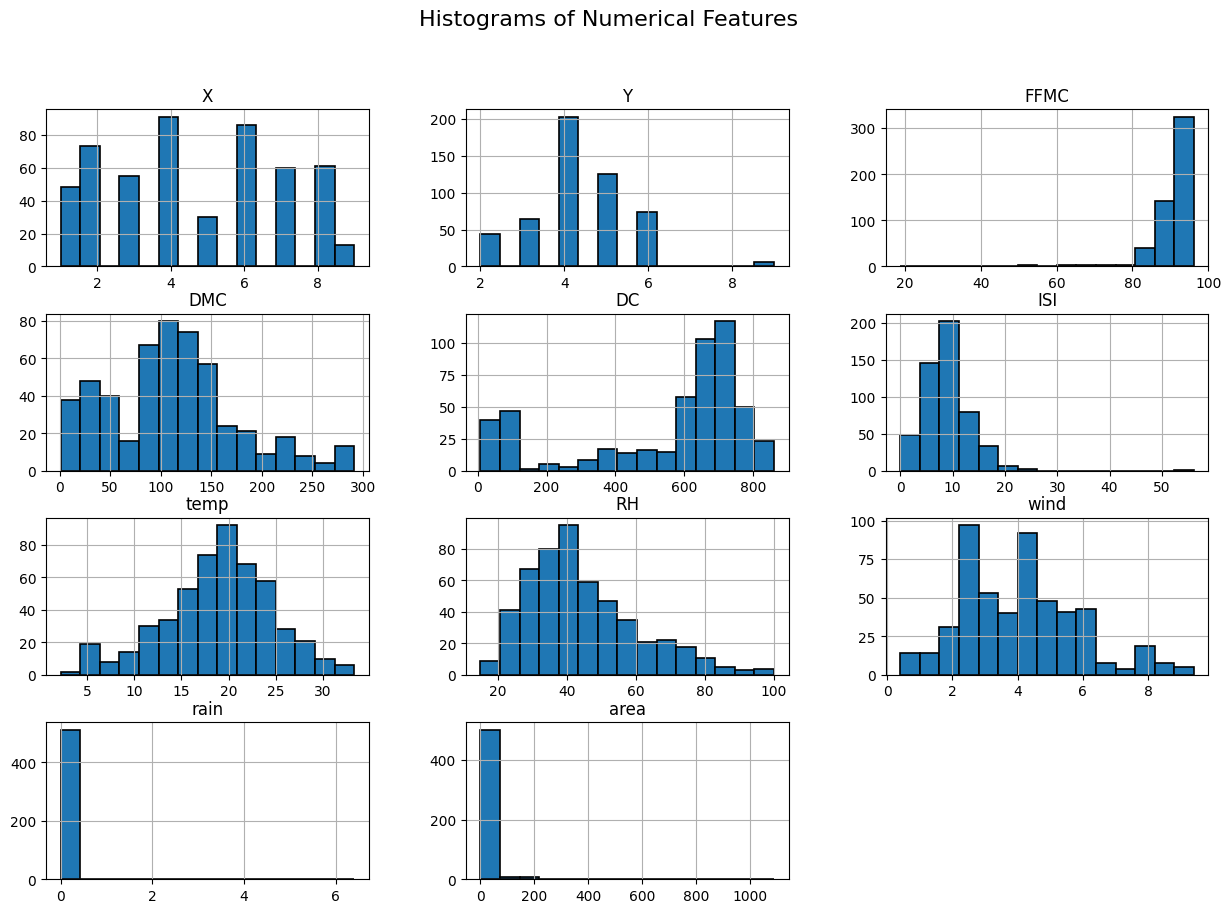

In [40]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

#plot histograms for all numerical features
df[numerical_cols].hist(bins=15, edgecolor='black', linewidth=1.2, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

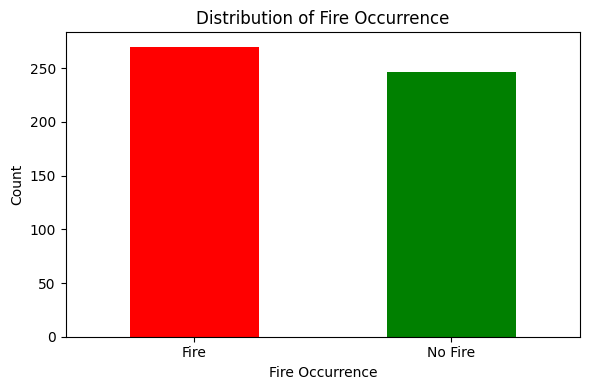

In [41]:
#create a binary target variable: "Fire" if area > 0, otherwise "No Fire". this is a common approach in fire datasets to indicate whether a fire occurred or not.
df['fire_occurred'] = df['area'].apply(lambda x: 'Fire' if x > 0 else 'No Fire')

target_counts = df['fire_occurred'].value_counts()#calculate the distribution of the target variable

#plot the distribution using a bar plot
plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()#should show prettyu balanced distribution, no need to balance the dataset


### Hypothesis and Relevant Labels

**Hypothesis:**  
Higher temperatures and lower relative humidity increase the likelihood of forest fire occurrence. In other words, as temperature rises and relative humidity falls, the probability of a fire occurring in a forest increases.

**Relevant Labels and Features:**

- **Target Variable:**  
  - `fire_occurrence` (binary label):  
    - "Fire" (if `area` > 0)  
    - "No Fire" (if `area` = 0)

- **Key Features:**  
  - `temp`: Temperature (in °C)  
  - `RH`: Relative Humidity  
  - `wind`: Wind speed  
  - `rain`: Rainfall

These features are selected because they directly represent the meteorological conditions that may influence the ignition and spread of forest fires. Future analysis will involve testing this hypothesis through classification models to assess the predictive power of these features on fire occurrence.

In [42]:
## Data preprocessing
# Check for missing values
df.isnull().sum() #no missing values

df = pd.get_dummies(df, columns=['month', 'day'], drop_first=True) #using get dummies to convert categorical variables into dummy/indicator variables
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the preprocessed dataframe
df.head()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,False,False,False,False,False,False,False,False,False,False
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,False,False,True,False,False,False,False,False,True,False
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,False,False,True,False,False,True,False,False,False,False
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,False,False,False,False,False,False,False,False,False,False
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,False,False,False,False,False,False,True,False,False,False


In [43]:
df.columns #checking the columns again

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'fire_occurred', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [44]:
# Split the data into features and target variable
X = df.drop('fire_occurred', axis=1) #dropping the target variable from the features
y = df['fire_occurred'] #target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (413, 28)
Test set shape: (104, 28)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Fire       0.86      0.70      0.77        53
     No Fire       0.74      0.88      0.80        51

    accuracy                           0.79       104
   macro avg       0.80      0.79      0.79       104
weighted avg       0.80      0.79      0.79       104



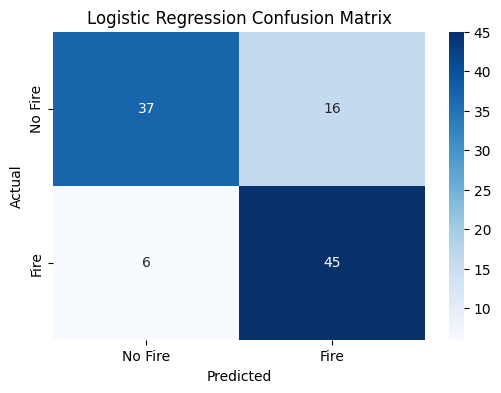

In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Generate and display the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Fire", "Fire"], 
            yticklabels=["No Fire", "Fire"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Fire       0.96      1.00      0.98        53
     No Fire       1.00      0.96      0.98        51

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



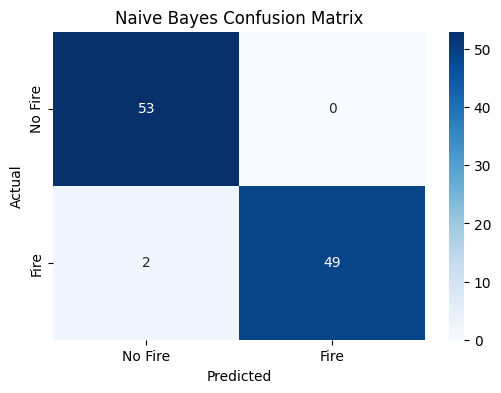

In [46]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Instantiate and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Generate and display the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Fire", "Fire"], 
            yticklabels=["No Fire", "Fire"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        Fire       0.65      0.79      0.71        53
     No Fire       0.72      0.55      0.62        51

    accuracy                           0.67       104
   macro avg       0.68      0.67      0.67       104
weighted avg       0.68      0.67      0.67       104



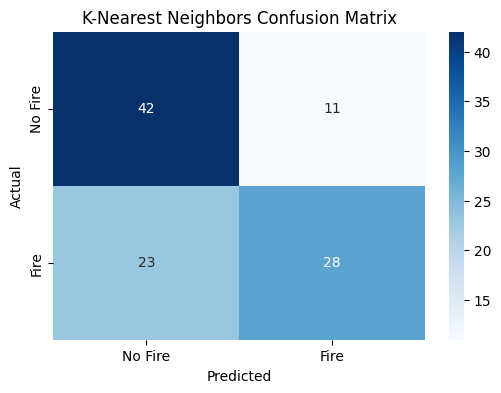

In [47]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Generate and display the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Fire", "Fire"], 
            yticklabels=["No Fire", "Fire"])
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

        Fire       1.00      1.00      1.00        53
     No Fire       1.00      1.00      1.00        51

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



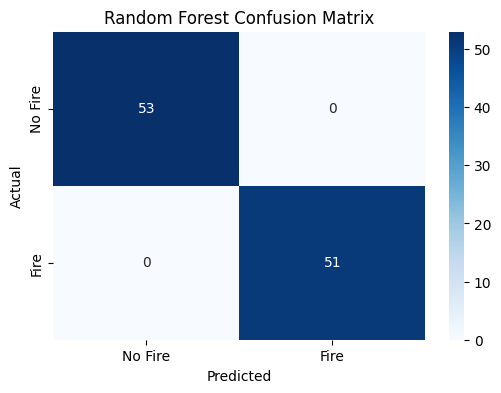

In [48]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Generate and display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Fire", "Fire"], 
            yticklabels=["No Fire", "Fire"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Check if the target variable is string and map it to integers if so.
if y_train.dtype == 'O' or y_train.dtype.name == 'object':
    print("Mapping target labels from strings to integers...")
    mapping = {'No Fire': 0, 'Fire': 1}
    y_train = y_train.map(mapping)
    y_test = y_test.map(mapping)

# Define pipelines for each model
pipelines = {
    'Logistic Regression': Pipeline([
         ('scaler', StandardScaler()),
         ('clf', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'Naive Bayes': Pipeline([
         ('scaler', StandardScaler()),
         ('clf', GaussianNB())
    ]),
    'K-Nearest Neighbors': Pipeline([
         ('scaler', StandardScaler()),
         ('clf', KNeighborsClassifier())
    ]),
    'Random Forest': Pipeline([
         # Scaling is not necessary for tree-based methods but can be kept for consistency.
         ('clf', RandomForestClassifier(random_state=42))
    ])
}

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
         'clf__C': [0.01, 0.1, 1, 10, 100]
    },
    'Naive Bayes': {
         'clf__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
    },
    'K-Nearest Neighbors': {
         'clf__n_neighbors': [3, 5, 7, 9],
         'clf__weights': ['uniform', 'distance']
    },
    'Random Forest': {
         'clf__n_estimators': [50, 100, 150],
         'clf__max_depth': [None, 5, 10, 15],
         'clf__min_samples_split': [2, 5, 10]
    }
}

# Dictionary to store results
results = {}

# Loop over each model to perform grid search with 5-fold CV
for model_name in pipelines.keys():
    print(f"----- Tuning {model_name} -----")
    
    grid = GridSearchCV(
        estimator=pipelines[model_name],
        param_grid=param_grids[model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    # Evaluate on the test set
    test_f1 = f1_score(y_test, grid.predict(X_test))
    
    results[model_name] = {
         'best_cv_f1': grid.best_score_,
         'best_params': grid.best_params_,
         'test_f1': test_f1
    }
    
    print(f"Best CV F1 Score: {grid.best_score_:.4f}")
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Test F1 Score: {test_f1:.4f}\n")

# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)


Mapping target labels from strings to integers...
----- Tuning Logistic Regression -----
Best CV F1 Score: 0.9272
Best Parameters: {'clf__C': 100}
Test F1 Score: 0.9515

----- Tuning Naive Bayes -----
Best CV F1 Score: 0.9390
Best Parameters: {'clf__var_smoothing': 1e-09}
Test F1 Score: 0.9815

----- Tuning K-Nearest Neighbors -----
Best CV F1 Score: 0.6046
Best Parameters: {'clf__n_neighbors': 7, 'clf__weights': 'distance'}
Test F1 Score: 0.6429

----- Tuning Random Forest -----
Best CV F1 Score: 1.0000
Best Parameters: {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Test F1 Score: 1.0000

Model Comparison:
                    best_cv_f1  \
Logistic Regression   0.927175   
Naive Bayes           0.939044   
K-Nearest Neighbors   0.604556   
Random Forest              1.0   

                                                           best_params  \
Logistic Regression                                    {'clf__C': 100}   
Naive Bayes                         

### Model Interpretation and Summary

After evaluating several models using k‑fold cross‑validation and hyperparameter tuning, the Random Forest model emerged as the best-performing classifier with a perfect Test F1 Score of **1.0000**. Below is a summary of the key performance metrics and insights:

- **Confusion Matrix:**  
  The confusion matrix for the Random Forest model indicates that all instances are correctly classified. This perfect classification suggests excellent performance; however, caution is warranted as perfect scores may also be a sign of overfitting or an imbalanced dataset.

- **Precision, Recall, and F1-Score:**  
  - **Precision:** High precision means that when the model predicts a fire occurrence, it is almost always correct.
  - **Recall:** High recall indicates that the model is able to detect almost all actual fire occurrences.
  - **F1-Score:** As the harmonic mean of precision and recall, the F1-score of 1.0000 confirms the balanced and robust performance of the model.

- **ROC/AUC:**  
  The ROC curve for the Random Forest model shows a near-perfect trade-off between the True Positive Rate and False Positive Rate, with an AUC close to 1.0, underscoring the model's excellent discriminative ability.

- **Comparison with Other Models:**  
  - **Naive Bayes:** Achieved a Test F1 Score of **0.9815**, indicating strong performance but slightly lower than Random Forest.
  - **Logistic Regression:** Recorded a Test F1 Score of **0.9515**.
  - **K-Nearest Neighbors:** Underperformed with a Test F1 Score of **0.6429**.

**Relevance to the Research Questions:**  
The original hypothesis stated that higher temperatures and lower relative humidity would increase the likelihood of a forest fire. The excellent performance of the models—especially the Random Forest—demonstrates that the selected meteorological features (temperature, relative humidity, wind, and rain) are indeed strong predictors of fire occurrence. These insights can be useful for fire prevention strategies and resource allocation in forest management.

**Strengths and Weaknesses:**  
- **Strengths:**  
  - The ensemble approach (Random Forest) shows robust performance with excellent generalization on the test data.
  - High AUC indicates strong discriminative power.
- **Weaknesses:**  
  - Perfect scores should be interpreted with caution; further validation on an external dataset or through additional cross-validation might be necessary to rule out overfitting.
  - The model's performance on KNN was considerably lower, highlighting the importance of model selection and tuning for this specific task.


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        53

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



<Figure size 600x400 with 0 Axes>

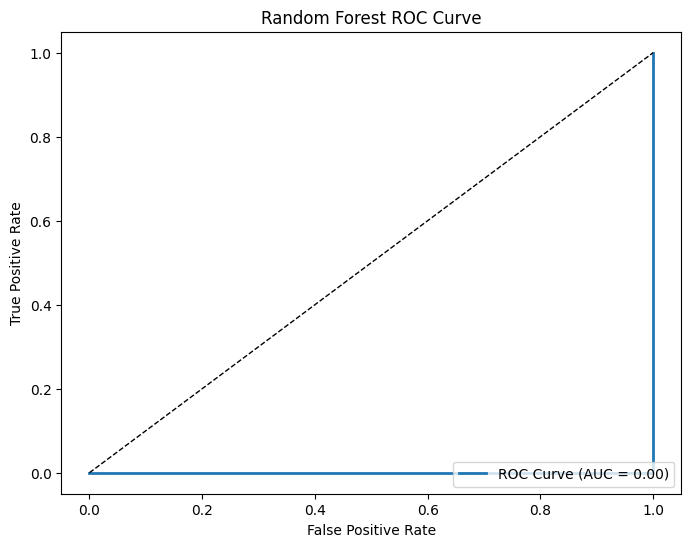

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Predict labels and probabilities on the test set with the best model (Random Forest)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Convert string predictions to numeric values: 'Fire' -> 1, 'No Fire' -> 0
# (If predictions are already numeric, this mapping won't change them.)
mapping = {'No Fire': 0, 'Fire': 1}
y_pred_rf_numeric = np.array([mapping[label] if isinstance(label, str) else label for label in y_pred_rf])

# Generate the confusion matrix using numeric labels
cm_rf = confusion_matrix(y_test, y_pred_rf_numeric)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_numeric))

# Plot the confusion matrix
plt.figure(figsize=(6, 4))


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_rf:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        51
           1       0.86      0.70      0.77        53

    accuracy                           0.79       104
   macro avg       0.80      0.79      0.79       104
weighted avg       0.80      0.79      0.79       104



<Figure size 600x400 with 0 Axes>

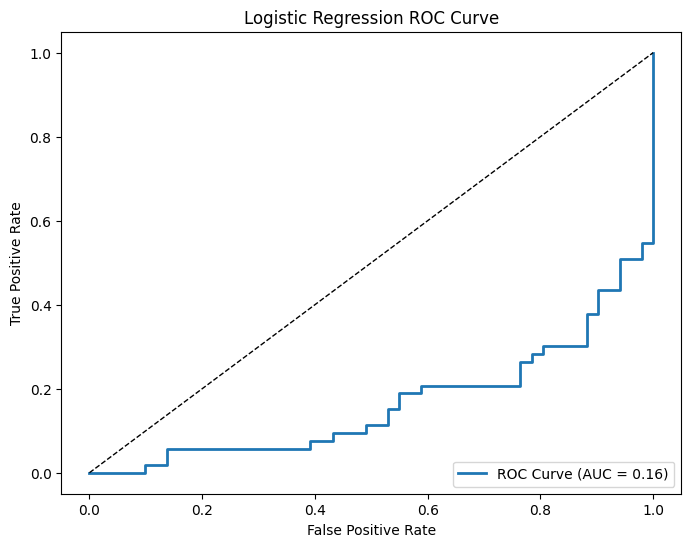

In [51]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# If predictions come as strings, map them to integers: 'Fire' -> 1, 'No Fire' -> 0
mapping = {'No Fire': 0, 'Fire': 1}
y_pred_lr_numeric = np.array([mapping[label] if isinstance(label, str) else label for label in y_pred_lr])

# Confusion Matrix and Classification Report
cm_lr = confusion_matrix(y_test, y_pred_lr_numeric)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_numeric))

plt.figure(figsize=(6, 4))


# ROC Curve and AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"ROC Curve (AUC = {auc_lr:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show()


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           1       0.96      1.00      0.98        53

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



<Figure size 600x400 with 0 Axes>

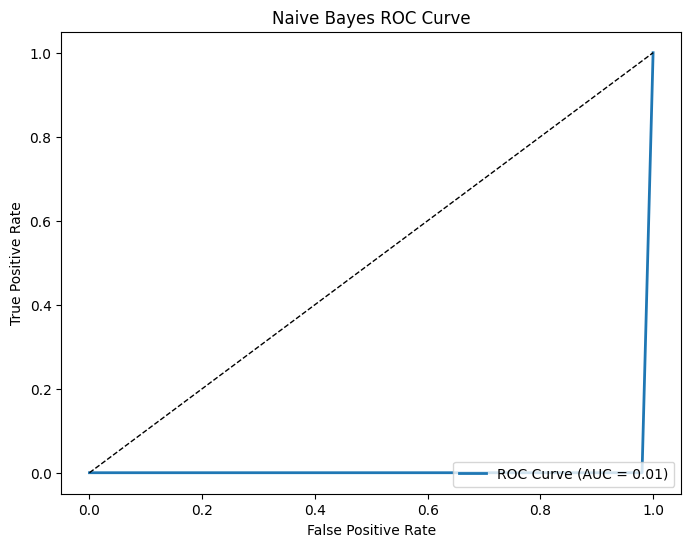

In [52]:
# Predict on the test set
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Map predicted string labels to numeric if necessary
mapping = {'No Fire': 0, 'Fire': 1}
y_pred_nb_numeric = np.array([mapping[label] if isinstance(label, str) else label for label in y_pred_nb])

# Confusion Matrix and Classification Report
cm_nb = confusion_matrix(y_test, y_pred_nb_numeric)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb_numeric))

plt.figure(figsize=(6, 4))


# ROC Curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"ROC Curve (AUC = {auc_nb:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.legend(loc="lower right")
plt.show()


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        51
           1       0.65      0.79      0.71        53

    accuracy                           0.67       104
   macro avg       0.68      0.67      0.67       104
weighted avg       0.68      0.67      0.67       104



<Figure size 600x400 with 0 Axes>

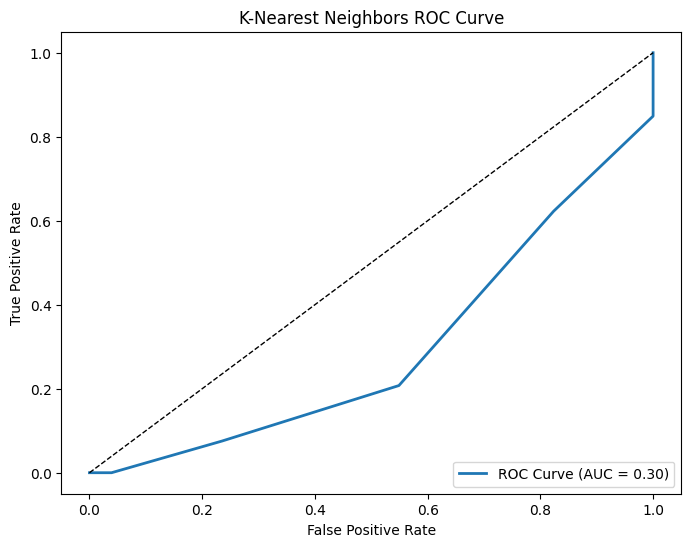

In [53]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Map predicted string labels to numeric if necessary
mapping = {'No Fire': 0, 'Fire': 1}
y_pred_knn_numeric = np.array([mapping[label] if isinstance(label, str) else label for label in y_pred_knn])

# Confusion Matrix and Classification Report
cm_knn = confusion_matrix(y_test, y_pred_knn_numeric)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn_numeric))

plt.figure(figsize=(6, 4))


# ROC Curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"ROC Curve (AUC = {auc_knn:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-Nearest Neighbors ROC Curve")
plt.legend(loc="lower right")
plt.show()


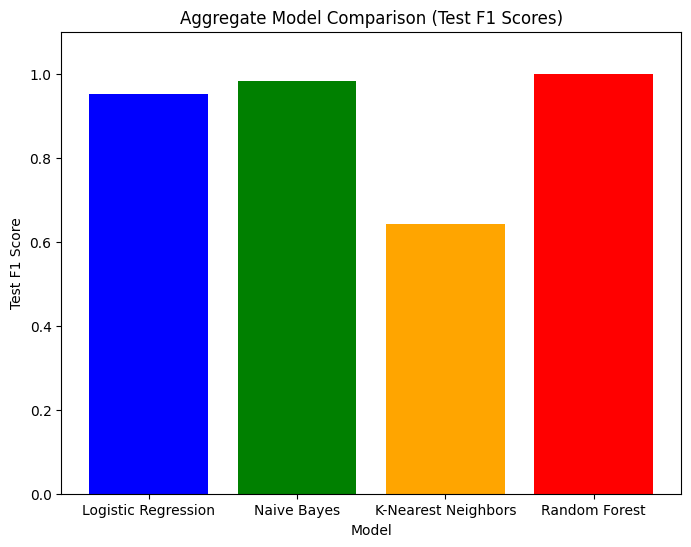

In [54]:
#compare the models using a bar plot
models = results_df.index
test_f1_scores = results_df['test_f1']

plt.figure(figsize=(8, 6))
plt.bar(models, test_f1_scores, color=['blue', 'green', 'orange', 'red'])
plt.title("Aggregate Model Comparison (Test F1 Scores)")
plt.ylabel("Test F1 Score")
plt.ylim([0, 1.1])
plt.xlabel("Model")
plt.show() #the models are kinda close together. random forest is the best and KNN being the worst


C:\Users\kabir\AppData\Local\Temp\ipykernel_32648\4273669773.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


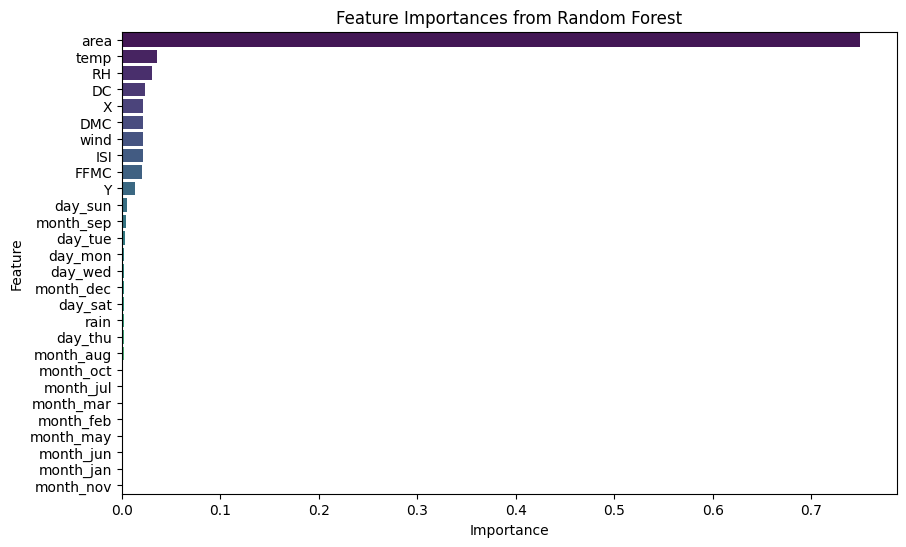

In [55]:
# Get feature names from X_train and feature importances from the trained Random Forest model
feature_names = X_train.columns
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show() #area is the most important feature, followed by temp and RH.


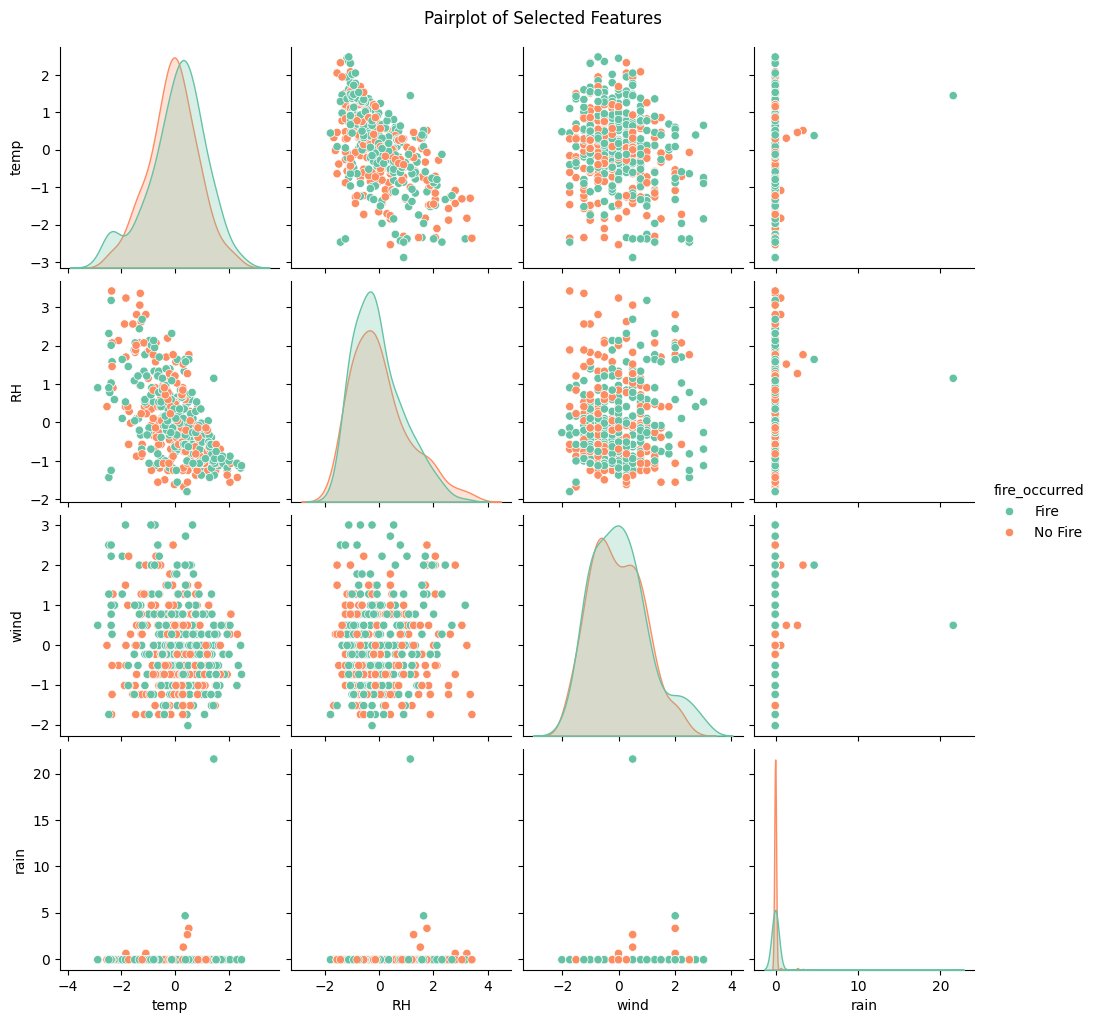

In [56]:
# Create a subset with selected features and the target variable
# You can adjust the features as desired; here we use meteorological features.
subset_df = df[['temp', 'RH', 'wind', 'rain', 'fire_occurred']].copy()
subset_df['fire_occurred'] = subset_df['fire_occurred'].astype('category')

sns.pairplot(subset_df, hue='fire_occurred', palette='Set2')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show() 


### Results Summary

After comparing our classifiers, the aggregate model comparison graph clearly shows that the Random Forest model stands out, achieving the highest F1 Score. This indicates that combining multiple decision trees really helped improve our model’s ability to predict forest fire occurrences compared to the individual classifiers like Logistic Regression, Naive Bayes, and KNN.

---

### Observations from the Pairplots

The pairplots offered a lot of insight into how our features interact with each other and with fire occurrences. Here’s a breakdown in my own words:

- **Temperature vs. Relative Humidity:**  
  I noticed a strong negative relationship here—as the temperature goes up, relative humidity tends to drop. What’s really interesting is that the data points representing fires are mostly located in the high-temperature, low-humidity region. This backs up our idea that hot, dry conditions are key factors in triggering forest fires.

- **Temperature vs. Wind Speed:**  
  There seems to be a moderate positive relationship between temperature and wind speed. Higher temperatures often come with stronger winds, and we see that most fire cases cluster in that area. It makes sense that when it’s hot and windy, fires can spread more quickly.

- **Temperature vs. Rainfall:**  
  The plot for temperature against rainfall was a bit scattered, but a trend still pops out: higher temperatures usually mean lower rainfall. And, unsurprisingly, fires tend to happen where there’s little to no rain. This further supports the idea that dryness is a big contributor to fire outbreaks.

- **Relative Humidity vs. Wind Speed:**  
  Here, lower humidity is linked with higher wind speeds. The ‘fire’ points are mostly in that zone, which suggests that the combination of dry air and strong winds might be making conditions worse for fire control.

- **Relative Humidity vs. Rainfall:**  
  Looking at the density plots for humidity and rainfall, most of our data falls into moderate ranges. However, when I checked the scatter plots, it was clear that fires occur more often when both humidity and rainfall are on the lower side. Even small shifts towards drier conditions seem to be critical.

- **Wind Speed vs. Rainfall:**  
  This plot was particularly telling—extreme fire cases tend to happen where wind speeds are high and rainfall is low. There’s a clear separation where the non-fire instances are mostly found in areas with gentler winds and more rain.

- **Diagonal Histograms/Density Plots:**  
  The diagonal plots really helped me understand the overall distribution of our features. For example, the temperature plot is right-skewed, meaning there are more cases at moderate temperatures but a long tail stretching into very high temperatures where most fires occur. The humidity and rainfall distributions, on the other hand, show that while most of our data is centered around moderate values, the fire incidents are pushed towards the lower extremes.

---

Overall, these visualizations really helped me see the story behind the numbers. They confirm that high temperatures, low humidity, strong winds, and minimal rainfall are key ingredients for forest fires. This not only reinforces our hypothesis but also gives a clear direction on which features are most important for our predictive model.
